
              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Jun 27 21:55:59 NodeManager::prepare_nodes [Info]: 
    Preparing 14 nodes for simulation.

Jun 27 21:55:59 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 14
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Jun 27 21:55:59 SimulationManager::run [Info]: 
    Simulation finished.


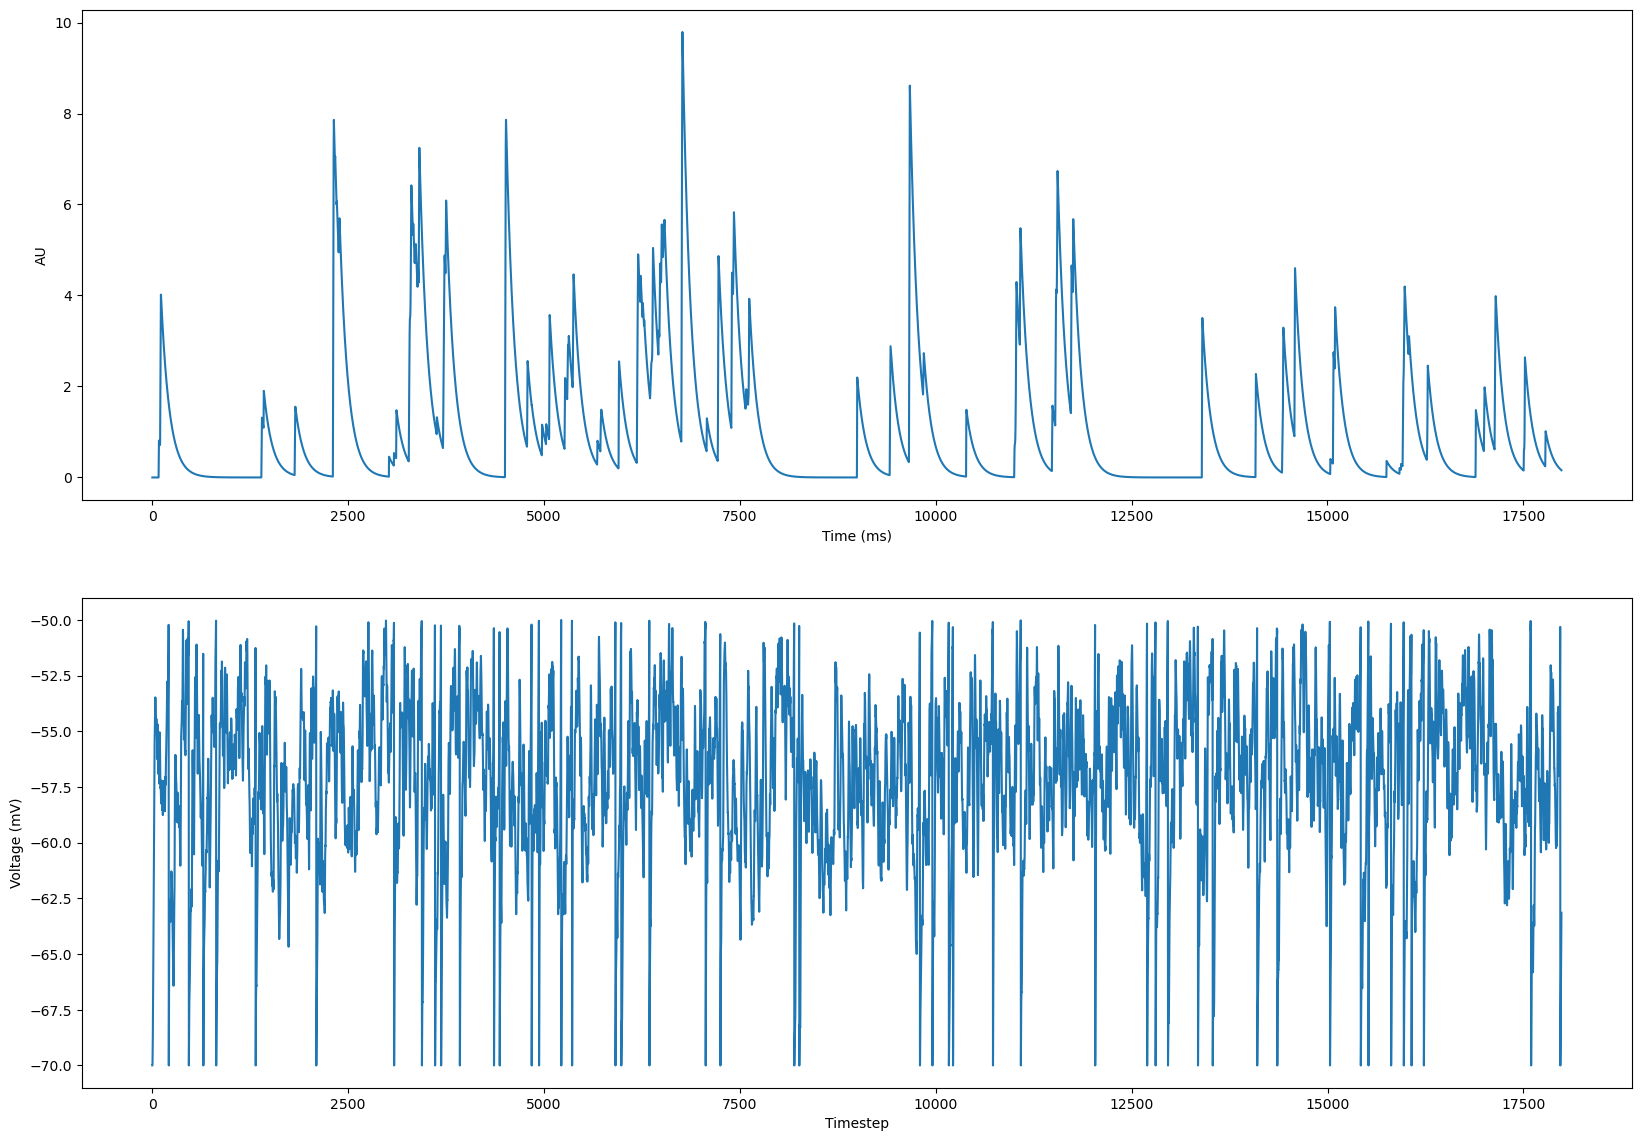

In [1]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from scripts import visualizations

calcium_trace_1 = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')[83]

pyr = nest.Create('iaf_psc_alpha', n=1, params=pyr_hcamp_deco2012.params)
external_input = nest.Create('poisson_generator', n=10)
external_input.set(rate=40)

external_parrot = nest.Create('parrot_neuron', n=1)


nest.Connect(external_input, external_parrot)
nest.Connect(external_parrot, pyr, syn_spec={'weight': 90})

Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, pyr)

spike_recorder = nest.Create('spike_recorder')
nest.Connect(pyr, spike_recorder)

nest.Simulate(17988)

ts = Vm_recorder.get('events')['times']
vms = Vm_recorder.get('events')['V_m']
fig, axs = plt.subplots(2, 1, figsize=(20, 14))
axs[0].plot(calcium_trace_1)
axs[0].set_ylabel('AU')
axs[0].set_xlabel('Time (ms)')


axs[1].plot(vms)
axs[1].set_ylabel('Voltage (mV)')
axs[1].set_xlabel('Timestep')

plt.savefig('/hpc/mzhu843/modelling/nest/plots/raw_vs_simulation_calcium.png')



